In [2]:
import ROOT as root
import numpy as np
import simulacion as s

Welcome to JupyROOT 6.30/04


# 3. Forma de las distribuciones de uniformidad

## Histogramas sin defecto

In [5]:
h = []

In [6]:
Cmed_list = [2232,4464,8929,17857,35714]
nct_list = [5,10,20,40,80]

N_pix = 64
num_cuentas = 10000

for C_med, nct in zip(Cmed_list,nct_list):
    dist = s.dist(N_pix,C_med,num_cuentas,3,11)
    name = s.histogram_name(N_pix,nct,1)
    hist = root.TH1D(name,'',400,0.,10.)
    for i in range(len(dist)):
        hist.Fill(dist[i])
    hist.Scale(1.0/hist.Integral(),"width")
    sigma=s.incertidumbre(hist,num_cuentas)
    print(np.max(sigma))
    for i,error in enumerate(sigma,start=1):
        hist.SetBinError(i,error)
    h.append(hist)



0.004983974317750845
0.004999839997439919
0.004995998398718718
0.004995998398718718
0.004750410508577127


In [8]:
graphs = []
for hist in h:
    graph = root.TGraphErrors(hist)
    graph.SetLineColor(hist.GetMarkerColor())
    graph.SetLineWidth(2)
    graph.SetMarkerStyle(21)
    graph.SetMarkerSize(1.5)
    graphs.append(graph)

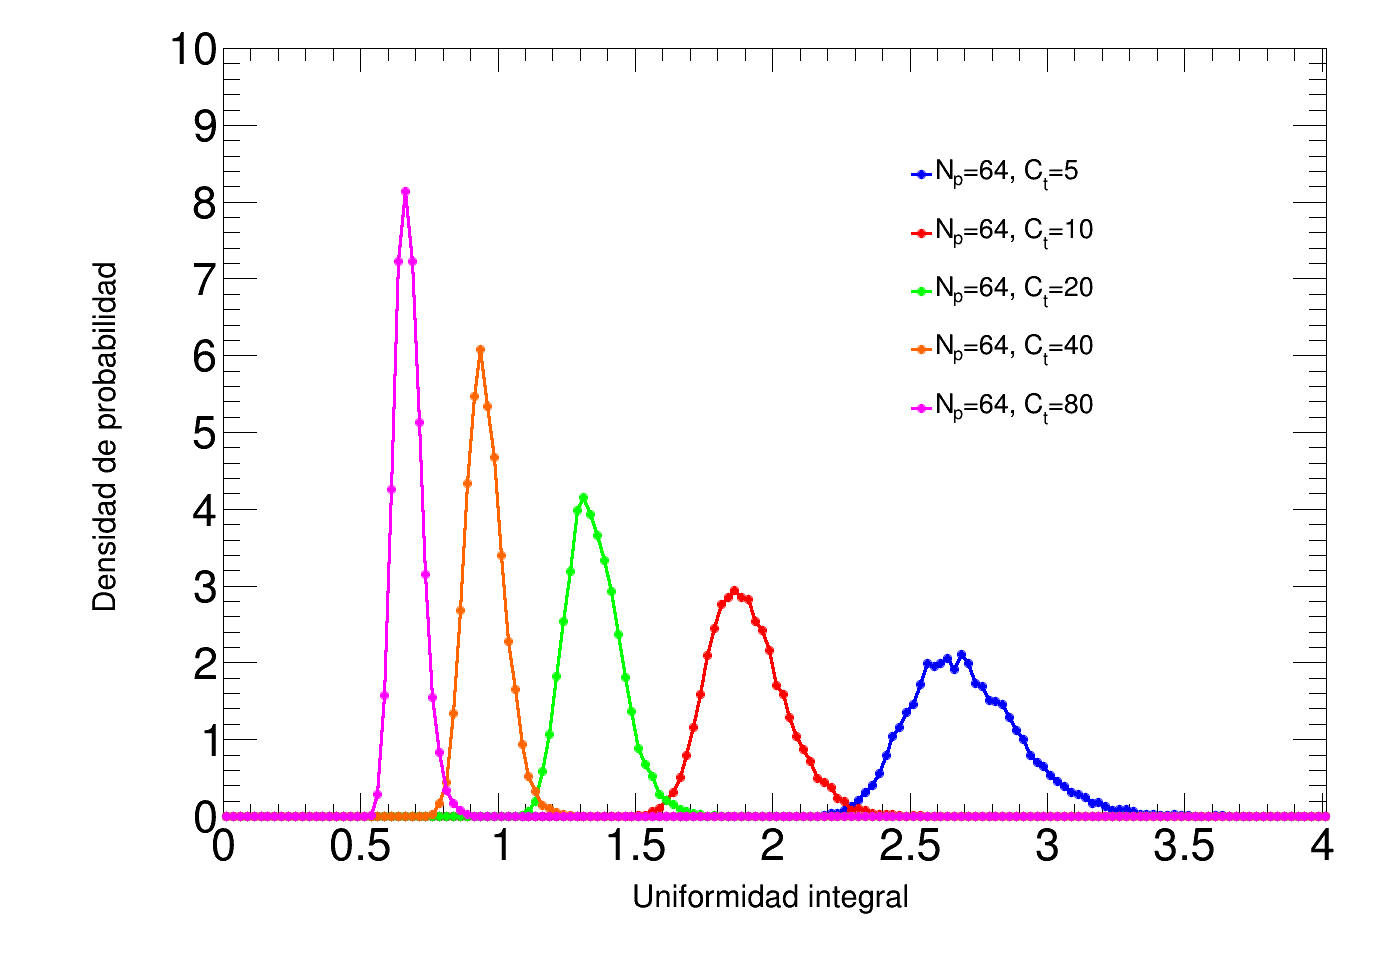

In [49]:
root.gROOT.SetStyle("ATLAS")
root.gROOT.ForceStyle()
canvas = root.TCanvas('', '', 1400, 1000)  # Increase width and height for higher resolution

legend = root.TLegend(0.65, 0.55, 0.85, 0.85)
legend.SetEntrySeparation(0.05)
legend.SetBorderSize(0)
legend.SetMargin(0.1)
legend.AddEntry(graphs[0],"N_{p}=64, C_{t}=5")
legend.AddEntry(graphs[1],"N_{p}=64, C_{t}=10")
legend.AddEntry(graphs[2],"N_{p}=64, C_{t}=20")
legend.AddEntry(graphs[3],"N_{p}=64, C_{t}=40")
legend.AddEntry(graphs[4],"N_{p}=64, C_{t}=80")
legend.SetTextFont(42)  # 42 is the font code for LaTeX-compatible fonts
legend.SetTextSize(0.03)  # Adjust the font size as needed

graphs[0].SetMarkerColor(root.kBlue)
graphs[1].SetMarkerColor(root.kRed)
graphs[2].SetMarkerColor(root.kGreen)
graphs[3].SetMarkerColor(root.kOrange+7)
graphs[4].SetMarkerColor(root.kMagenta)

graphs[0].SetLineColor(root.kBlue)
graphs[1].SetLineColor(root.kRed)
graphs[2].SetLineColor(root.kGreen)
graphs[3].SetLineColor(root.kOrange+7)
graphs[4].SetLineColor(root.kMagenta)

'''graphs[4].SetMarkerColor(1)
graphs[4].SetLineColor(graphs[4].GetMarkerColor())'''
# Draw the first TGraph with a smooth curve
graphs[0].SetLineWidth(3)
graphs[0].SetMarkerSize(1)
graphs[0].Draw("APL")

# Draw the remaining TGraphs with smooth curves
for i in range(1, len(graphs)):
    graphs[i].SetLineWidth(3)
    graphs[i].SetMarkerSize(1)
    graphs[i].Draw("PL SAME")


# Set titles and ranges
graphs[0].SetTitle("Distribuciones de uniformidad integral")
graphs[0].GetXaxis().SetTitle("Uniformidad integral")
graphs[0].GetYaxis().SetTitle("Densidad de probabilidad")
graphs[0].GetXaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetYaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetXaxis().CenterTitle()
graphs[0].GetYaxis().CenterTitle()
graphs[0].GetXaxis().SetTitleOffset(1.5) 
graphs[0].GetYaxis().SetTitleOffset(1.5)
graphs[0].GetYaxis().SetRangeUser(0, 10)
graphs[0].GetXaxis().SetRangeUser(0, 4)

legend.Draw()
canvas.Draw()


## Distribuciones con defecto 

### Comparativa distintos defectos

In [1]:
h = []

In [3]:
Cmed = 8929
nct = 20
t_list = [0]
k_list = [0]
media = np.zeros((len(t_list),len(k_list)))
varianza = np.zeros((len(t_list),len(k_list)))
N_pix = 64
num_cuentas = 10000

for i in range(len(t_list)):
    for j in range(len(k_list)):
        t = t_list[i]
        k = k_list[j]
        dist = s.dist_defectos(t,k,N_pix,Cmed,num_cuentas,3,11)
        name = s.histogram_name(N_pix,nct,1,t,k)
        hist = root.TH1D(name,'',400,0.,10.)
        for k in range(len(dist)):
            hist.Fill(dist[k])
        hist.Scale(1.0/hist.Integral(),"width")
        sigma=s.incertidumbre(hist,num_cuentas)
        for k,error in enumerate(sigma,start=1):
            hist.SetBinError(k,error)
        h.append(hist)
        
        

In [4]:
graphs = []
for hist in h:
    graph = root.TGraphErrors(hist)
    graph.SetLineColor(hist.GetMarkerColor())
    graph.SetLineWidth(2)
    graph.SetMarkerStyle(21)
    graph.SetMarkerSize(1.5)
    graphs.append(graph)

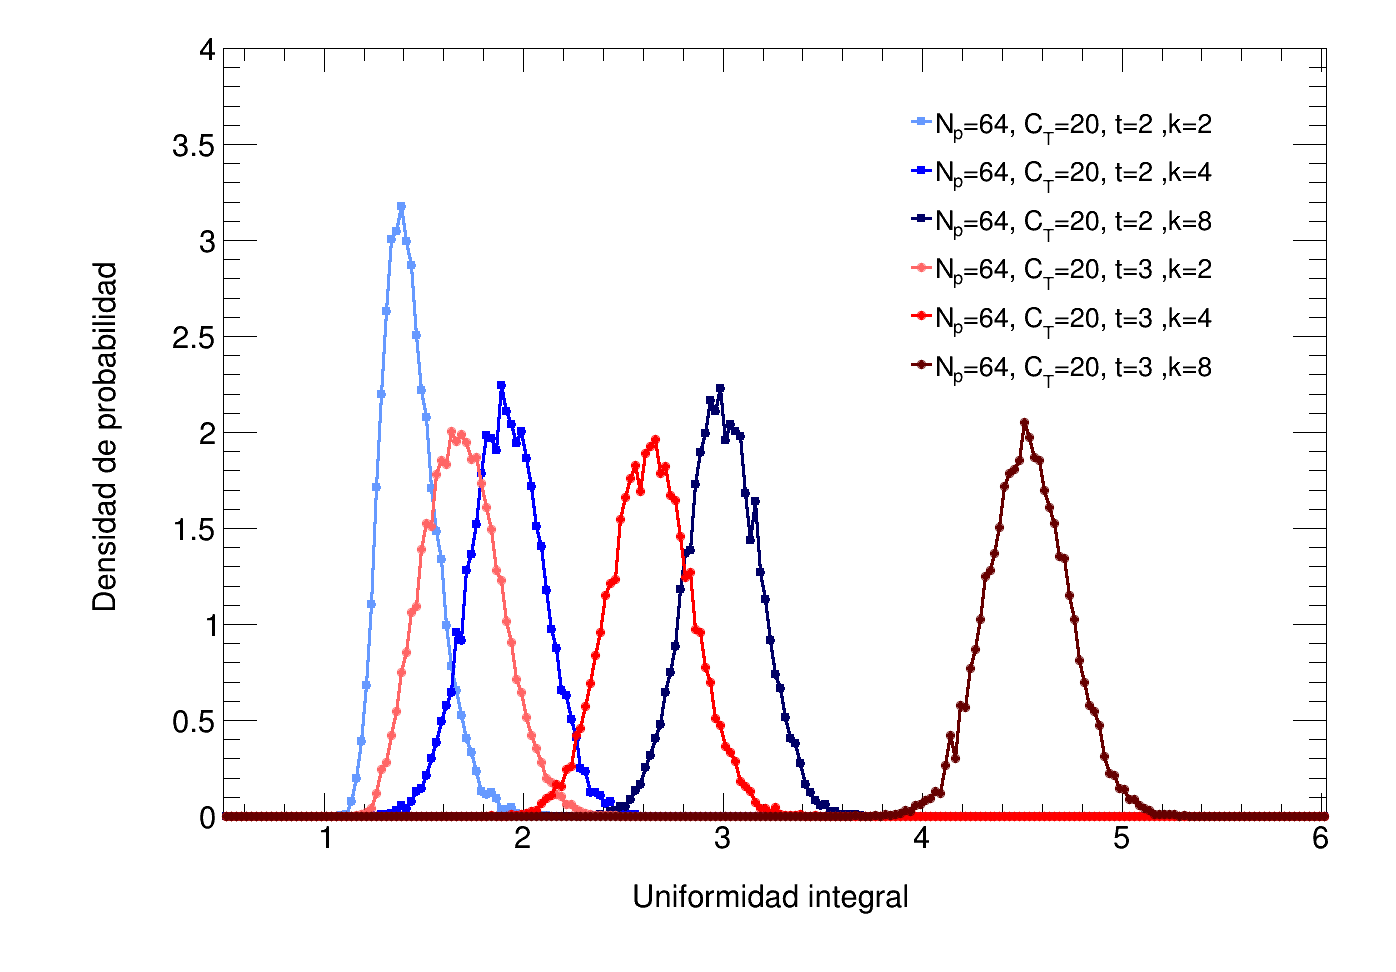

In [22]:
root.gROOT.SetStyle("ATLAS")
root.gROOT.ForceStyle()
canvas = root.TCanvas('', '', 1400, 1000)  # Increase width and height for higher resolution

legend = root.TLegend(0.65, 0.60, 0.85, 0.90)
legend.SetEntrySeparation(0.05)
legend.SetBorderSize(0)
legend.SetMargin(0.1)
legend.AddEntry(graphs[0],"N_{p}=64, C_{T}=20, t=2 ,k=2")
legend.AddEntry(graphs[1],"N_{p}=64, C_{T}=20, t=2 ,k=4")
legend.AddEntry(graphs[2],"N_{p}=64, C_{T}=20, t=2 ,k=8")
legend.AddEntry(graphs[3],"N_{p}=64, C_{T}=20, t=3 ,k=2")
legend.AddEntry(graphs[4],"N_{p}=64, C_{T}=20, t=3 ,k=4")
legend.AddEntry(graphs[5],"N_{p}=64, C_{T}=20, t=3 ,k=8")
legend.SetTextFont(42)  # 42 is the font code for LaTeX-compatible fonts
legend.SetTextSize(0.03)  # Adjust the font size as needed

graphs[0].SetMarkerColor(root.kAzure-4)
graphs[1].SetMarkerColor(root.kBlue)
graphs[2].SetMarkerColor(root.kBlue+3)
graphs[3].SetMarkerColor(root.kRed-7)
graphs[4].SetMarkerColor(root.kRed)
graphs[5].SetMarkerColor(root.kRed+3)

graphs[0].SetLineColor(root.kAzure-4)
graphs[1].SetLineColor(root.kBlue)
graphs[2].SetLineColor(root.kBlue+3)
graphs[3].SetLineColor(root.kRed-7)
graphs[4].SetLineColor(root.kRed)
graphs[5].SetLineColor(root.kRed+3)

graphs[3].SetMarkerStyle(20)
graphs[4].SetMarkerStyle(20)
graphs[5].SetMarkerStyle(20)

'''graphs[4].SetMarkerColor(1)
graphs[4].SetLineColor(graphs[4].GetMarkerColor())'''
# Draw the first TGraph with a smooth curve
graphs[0].SetLineWidth(3)
graphs[0].SetMarkerSize(1)
graphs[0].Draw("APL")

# Draw the remaining TGraphs with smooth curves
for i in range(1, len(graphs)):
    graphs[i].SetLineWidth(3)
    graphs[i].SetMarkerSize(1)
    graphs[i].Draw("PL SAME")


# Set titles and ranges
graphs[0].SetTitle("Distribuciones de uniformidad integral")
graphs[0].GetXaxis().SetTitle("Uniformidad integral")
graphs[0].GetYaxis().SetTitle("Densidad de probabilidad")
graphs[0].GetXaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetYaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetXaxis().CenterTitle()
graphs[0].GetYaxis().CenterTitle()
graphs[0].GetXaxis().SetTitleOffset(1.5) 
graphs[0].GetYaxis().SetTitleOffset(1.5)
graphs[0].GetYaxis().SetRangeUser(0, 4)
graphs[0].GetXaxis().SetRangeUser(0.5, 6)

legend.Draw()
canvas.Draw()
